In [1]:
import os
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Concatenate, UpSampling2D, Reshape
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, LeakyReLU, Conv2DTranspose
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras import layers

import sklearn
from sklearn.model_selection import train_test_split

from natsort import natsorted

import cv2
import shutil
import glob

dataset_dir = '/home/lingfeng/Downloads/PMGstudycaseslabelled/PMGstudycaseslabelled'
dataset_dir_normal = '/home/lingfeng/Downloads/PMGControlsEditedDec2021'

def test_usable_label(slice_):
    label_num = slice_.split('.')[0].split('_')[-1]
    label_num = int(label_num)
    if(label_num == 3):
        return False
    else:
        return True

def get_label(slices):
    label_num = slices.split('.')[0].split('_')[-1]
    label_num = int(label_num)
    if(label_num == 1):
        label = 'Yes'
    else:
        label = 'No'
    return label

df = pd.DataFrame(columns=['ID', 'abnormal', 'normal'])

print("patient id sequence:", natsorted(os.listdir(dataset_dir)))
for patient_item in tqdm(natsorted(os.listdir(dataset_dir))):

    patient_item_statistics_abnormal = []

    patient_path_saved = os.path.join(dataset_dir, patient_item)

    normal_abnormal = os.listdir(patient_path_saved)
    if(normal_abnormal[0].__contains__("cor")):
        coronal_path_saved = os.path.join(patient_path_saved, normal_abnormal[0])

    else:
        coronal_path_saved = os.path.join(patient_path_saved, normal_abnormal[1])

    coronal_path_list = os.listdir(coronal_path_saved)

    for slice_num in range(len(coronal_path_list)):
        if(test_usable_label(coronal_path_list[slice_num])):
            pass
        else:
            continue
        
        patient_item_statistics_abnormal.append(get_label(coronal_path_list[slice_num]))

    patient_item_statistics_abnormal = np.array(patient_item_statistics_abnormal)

    patient_item_statistics_abnormal = np.where(patient_item_statistics_abnormal=='No', 0, 1)

    print("patient_item:",patient_item)
    print("length:",len(patient_item_statistics_abnormal))
    print("abnormal:",np.sum(patient_item_statistics_abnormal))

    df = df.append({'ID': int(patient_item), 'abnormal': int(np.sum(patient_item_statistics_abnormal)), 'normal': int(len(patient_item_statistics_abnormal)-int(np.sum(patient_item_statistics_abnormal)))}, ignore_index=True)

print("patient id sequence:", natsorted(os.listdir(dataset_dir_normal)))
for patient_item in tqdm(natsorted(os.listdir(dataset_dir_normal))):

    patient_item_statistics_normal = []

    patient_path_saved = os.path.join(dataset_dir_normal, patient_item)

    patient_sub_dir = os.listdir(patient_path_saved)

    for sub_dir in range(len(patient_sub_dir)):
        control_path_saved = os.path.join(patient_path_saved, patient_sub_dir[sub_dir])
        control_path_list = os.listdir(control_path_saved)
        for slice_num in range(len(control_path_list)):
            patient_item_statistics_normal.append('No')

    patient_item_statistics_normal = np.array(patient_item_statistics_normal)

    patient_item_statistics_normal = np.where(patient_item_statistics_normal=='No', 0, 1)

    print("patient_item:",patient_item)
    print("length:",len(patient_item_statistics_normal))
    print("normal:",np.sum(patient_item_statistics_normal))

    condition = (df.ID==int(patient_item))

    print(df.loc[condition].normal)

    df.loc[condition, 'normal']=df.loc[condition].normal + int(len(patient_item_statistics_normal))

print(df)

df['ratio'] = df.normal / df.abnormal

print(df)

df = df.drop([22])

total_ratio = df.normal.sum() / df.abnormal.sum()

print("total_ratio:",total_ratio)

  0%|          | 0/24 [00:00<?, ?it/s]

patient id sequence: ['2', '3', '4', '5', '6', '8', '9', '10', '12', '13', '14', '16', '17', '18', '19', '20', '22', '23', '28', '29', '30', '31', '33', '34']
patient_item: 2
length: 132
abnormal: 35
patient_item: 3
length: 212
abnormal: 158
patient_item: 4
length: 170
abnormal: 145
patient_item: 5
length: 158
abnormal: 133
patient_item: 6
length: 122
abnormal: 122
patient_item: 8
length: 197
abnormal: 51
patient_item: 9
length: 131
abnormal: 30
patient_item: 10
length: 230
abnormal: 179
patient_item: 12
length: 128
abnormal: 29
patient_item: 13
length: 124
abnormal: 100
patient_item: 14
length: 137
abnormal: 104
patient_item: 16
length: 142
abnormal: 107
patient_item: 17
length: 138
abnormal: 86
patient_item: 18
length: 131
abnormal: 94
patient_item: 19
length: 197
abnormal: 129
patient_item: 20
length: 125
abnormal: 61
patient_item: 22
length: 137
abnormal: 68
patient_item: 23
length: 161
abnormal: 134
patient_item: 28
length: 144
abnormal: 96
patient_item: 29
length: 137
abnormal: 2

100%|██████████| 24/24 [00:00<00:00, 98.90it/s]

patient_item: 4
length: 352
normal: 0
2    25
Name: normal, dtype: object
patient_item: 5
length: 518
normal: 0
3    25
Name: normal, dtype: object
patient_item: 6
length: 530
normal: 0
4    0
Name: normal, dtype: object
patient_item: 8
length: 540
normal: 0
5    146
Name: normal, dtype: object
patient_item: 9
length: 355
normal: 0
6    101
Name: normal, dtype: object
patient_item: 10
length: 590
normal: 0
7    51
Name: normal, dtype: object
patient_item: 12
length: 372
normal: 0
8    99
Name: normal, dtype: object
patient_item: 13
length: 368
normal: 0
9    24
Name: normal, dtype: object
patient_item: 14
length: 380
normal: 0
10    33
Name: normal, dtype: object
patient_item: 16
length: 506
normal: 0
11    35
Name: normal, dtype: object
patient_item: 17
length: 387
normal: 0
12    52
Name: normal, dtype: object
patient_item: 18
length: 378
normal: 0
13    37
Name: normal, dtype: object
patient_item: 19
length: 594
normal: 0
14    68
Name: normal, dtype: object
patient_item: 20
length:

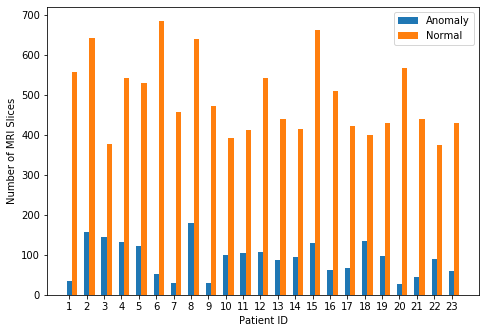

In [2]:
X = np.arange(23)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, df.abnormal.to_numpy(), width = 0.3)
ax.bar(X + 0.3, df.normal.to_numpy(), width = 0.3)
ax.legend(labels=['Anomaly', 'Normal'])

# plt.xticks(X, tuple(df.ID.to_numpy()))
plt.xticks(X, X+1)
# plt.title('My title')
plt.xlabel('Patient ID')
plt.ylabel('Number of MRI Slices')

plt.show()

In [3]:
df = pd.DataFrame(columns=['ID', 'abnormal', 'normal'])

print("patient id sequence:", natsorted(os.listdir(dataset_dir)))
for patient_item in tqdm(natsorted(os.listdir(dataset_dir))):

    patient_item_statistics_abnormal = []

    patient_path_saved = os.path.join(dataset_dir, patient_item)

    normal_abnormal = os.listdir(patient_path_saved)
    if(normal_abnormal[0].__contains__("cor")):
        coronal_path_saved = os.path.join(patient_path_saved, normal_abnormal[0])

    else:
        coronal_path_saved = os.path.join(patient_path_saved, normal_abnormal[1])

    coronal_path_list = os.listdir(coronal_path_saved)

    for slice_num in range(len(coronal_path_list)):
        if(test_usable_label(coronal_path_list[slice_num])):
            pass
        else:
            continue
        
        patient_item_statistics_abnormal.append(get_label(coronal_path_list[slice_num]))

    patient_item_statistics_abnormal = np.array(patient_item_statistics_abnormal)

    patient_item_statistics_abnormal = np.where(patient_item_statistics_abnormal=='No', 0, 1)

    print("patient_item:",patient_item)
    print("length:",len(patient_item_statistics_abnormal))
    print("abnormal:",np.sum(patient_item_statistics_abnormal))

    df = df.append({'ID': int(patient_item), 'abnormal': int(np.sum(patient_item_statistics_abnormal)), 'normal': int(len(patient_item_statistics_abnormal)-int(np.sum(patient_item_statistics_abnormal)))}, ignore_index=True)


100%|██████████| 24/24 [00:00<00:00, 253.70it/s]

patient id sequence: ['2', '3', '4', '5', '6', '8', '9', '10', '12', '13', '14', '16', '17', '18', '19', '20', '22', '23', '28', '29', '30', '31', '33', '34']
patient_item: 2
length: 132
abnormal: 35
patient_item: 3
length: 212
abnormal: 158
patient_item: 4
length: 170
abnormal: 145
patient_item: 5
length: 158
abnormal: 133
patient_item: 6
length: 122
abnormal: 122
patient_item: 8
length: 197
abnormal: 51
patient_item: 9
length: 131
abnormal: 30
patient_item: 10
length: 230
abnormal: 179
patient_item: 12
length: 128
abnormal: 29
patient_item: 13
length: 124
abnormal: 100
patient_item: 14
length: 137
abnormal: 104
patient_item: 16
length: 142
abnormal: 107
patient_item: 17
length: 138
abnormal: 86
patient_item: 18
length: 131
abnormal: 94
patient_item: 19
length: 197
abnormal: 129
patient_item: 20
length: 125
abnormal: 61
patient_item: 22
length: 137
abnormal: 68
patient_item: 23
length: 161
abnormal: 134
patient_item: 28
length: 144
abnormal: 96
patient_item: 29
length: 137
abnormal: 2

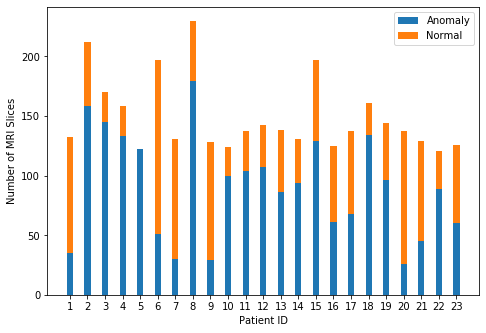

In [4]:
df = df.drop([22])
N = 23
abnormal_list = df.abnormal.to_numpy()
normal_list = df.normal.to_numpy()
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, abnormal_list, width)
ax.bar(ind, normal_list, width,bottom=abnormal_list)
ax.legend(labels=['Anomaly', 'Normal'])

# plt.xticks(X, tuple(df.ID.to_numpy()))
plt.xticks(X, ind+1)
# plt.title('My title')
plt.xlabel('Patient ID')
plt.ylabel('Number of MRI Slices')

plt.show()